# General Notebook

In [1]:
seed = 123
import os
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import random
import torch
random.seed(seed)     # python random generator
np.random.seed(seed)  # numpy random generator

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import cv2 



In [2]:

# Change the name to create or load the data and models
path = os.getcwd()
folder_data = r'Data\carriage'
#-------------------------------
if torch.cuda.is_available():  
    device = "cuda:0" 
else:  
    device = "cpu"  
print(device)

cpu


## Data

In [46]:
data = 'carriage06_4.npy'
images = np.load(os.path.join(folder_data, data))
image_x, y_true, image_y = images
name_image = data[:-4]
print('Name of the image', name_image)

Name of the image carriage06_4


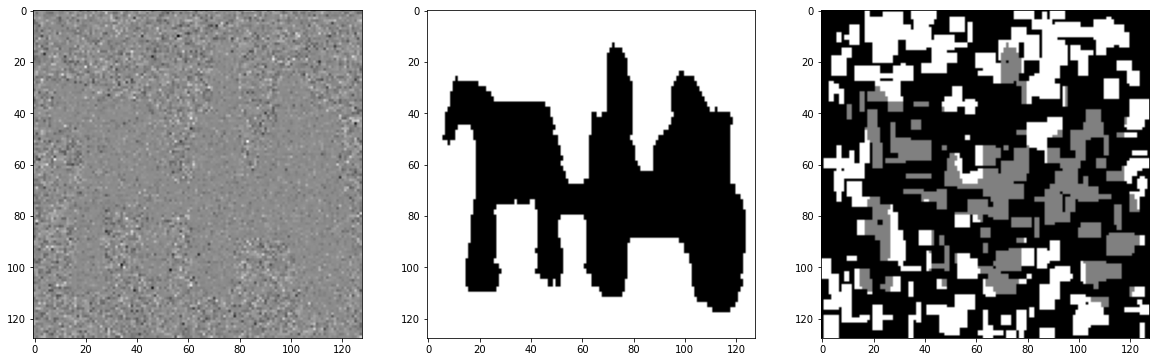

In [47]:
  
fig = plt.figure(figsize=(20, 30))  
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(image_x, cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.imshow(y_true, cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.imshow(image_y, cmap='gray')

## Functions and models

In [36]:
from models.models_v3 import *
from utils.training import *
from utils.test import *

# Trained Models

In [27]:
# General Parameters (we do not change the values of these parameters during the simulations)
x_dim = 1
y_dim = 1
z_dim = 1


## VLS

In [19]:
# Dimension of latent variables
h_dim = 14#None # This value is not necessary for the TMM model but we need to define it for TMM_3
num_neurons = 33
add_loss = True
#--------------------------------------------
model = VSL( x_dim, z_dim, y_dim, h_dim, num_neurons, device)
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
# data = model.__class__.__name__.casefold()
# print(f'Actual path to save our models for {data} is \n {path_save} ')
# # #* Initialization of the model in an specific epoch
# model.to(device)
# epoch_init = 100
# model = model_reconstruction(model,epoch_init, path_save, device)




VSL has 1464 parameters to train
z_dim = 1, num_neurons = 33, h_dim = 14


In [21]:
# # #* Reconstruction
# y_ = model.reconstruction(x,y)
# y_pred_m = y_[np.where(y1 == -1)].numpy()
# y_true_m = y_true[np.where(y1 == -1)]
# error_rate = 1-accuracy_score(y_true_m, y_pred_m)
# print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

# y_vls = y_.reshape(m,n).cpu().numpy()

In [22]:

# plt.imshow(img_save(y_vls), cmap='gray')
# plt.axis('off')
# plt.savefig(os.path.join(path_save,f'{name_image}_{data}.png'),transparent=True,format='png', bbox_inches='tight', pad_inches=0)

## TMM

In [49]:
# Dimension of latent variables
z_dim = 1
h_dim = 15#None # This value is not necessary for the TMM model but we need to define it for TMM_3
num_neurons = 26 #? == h_dim?
add_loss = True
#--------------------------------------------
model = TMM(x_dim, z_dim, y_dim, h_dim, num_neurons, device, add_loss)
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')


TMM has 1440 parameters to train
z_dim = 1, num_neurons = 26, h_dim = 15


In [50]:
general_path  = os.path.join(os.getcwd(), 'Results_models') 
# data = model.__class__.__name__.casefold()
# path_save = os.path.join(general_path, data)
# model.to(device)
epoch_init = 50
# model = model_reconstruction(model,epoch_init, path_save, device)
size = 128
setting = ''
error_rate = test_model(model, device, name_image, setting, 
                        general_path, image_x, image_y, y_true,
                        size,epoch_init)
  

carriage06_4: TMM error 0.3723283427981414
Images saved.
Folder moved.
Folder moved successfully!


In [11]:
# Dimension of latent variables
z_dim = 1
h_dim = 10#None # This value is not necessary for the TMM model but we need to define it for TMM_3
num_neurons = 28 #? == h_dim?
add_loss = True
#--------------------------------------------
model = TMM_1(x_dim, z_dim, y_dim, h_dim, num_neurons, device, add_loss)
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')

TMM_1 has 1138 parameters to train
z_dim = 1, num_neurons = 28, h_dim = 10


In [13]:
# Dimension of latent variables
z_dim = 1
h_dim = 10#None # This value is not necessary for the TMM model but we need to define it for TMM_3
num_neurons = 26 #? == h_dim?
add_loss = True
#--------------------------------------------
model = TMM_2(x_dim, z_dim, y_dim, h_dim, num_neurons, device, add_loss)
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')

TMM_2 has 1092 parameters to train
z_dim = 1, num_neurons = 26, h_dim = 10


## SVRNN

In [35]:
# Dimension of latent variables
z_dim = 1
h_dim = 14
num_neurons = 17
add_loss = True
#--------------------------------------------
model = SVRNN(x_dim, z_dim, h_dim, y_dim, num_neurons, device, add_loss)
# Save models
#--------------------------------------------
model.to(device)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')


SVRNN has 1445 parameters to train
z_dim = 1, num_neurons = 17, h_dim = 14
